In [ ]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

from func_e.FUNC_E import FUNC_E # import the class
import func_e.vocabs.all as vocabs

In [ ]:
from matrix_class import ProteinMatrix
from matrix_class import SubMatrix
from cluster_class import AllClusters
from degreelist_class import DegreeList

In [1]:
from connected_components_utils import *
from analysis_utils import *

In [2]:
dream3_cluster_dict_file = "../data/results/DREAM-3-cc/d3_5_100.json-cluster.json"
dict_of_clusters = {}
# # convert actual cluster file to a dictionary!!
with open(dream3_cluster_dict_file,"r") as cluster_dict_file:
    dict_of_clusters = json.load(cluster_dict_file)

In [3]:
matrix, clusters, degreelist = initialize_matrix_clusters_degreelist("../data/networks/DREAM_files/dream_3.txt", "../data/results/DREAM-3-cc/d3_5_100.json-cluster.json")

In [4]:
genomic_background_filepath = '../data/testing_data/protein_list.txt'
all_go_terms = vocabs.getTerms(['GO'])
term_mapping_filepath = 'term_mapping.txt'
create_term_mapping_list('../data/go-results/dream_3_go_results.tsv', term_mapping_filepath)

#### Option 1: all clusters with > 3 proteins, all proteins that will connect > 3 components

step 1: find qualifying proteins and clusters

In [5]:
qualifying_clusters_1, qualifying_proteins_1 = find_clusters_and_proteins_together(matrix, clusters, degreelist, cluster_ratio=0, cluster_constant=3, min_components_that_protein_connects=3)

In [ ]:
print(qualifying_clusters_1)
print(qualifying_proteins_1)

step 1b: print qualifying clusters to a querylist

In [7]:
original_clusters_querylist_1 = 'og_querylist_1.txt'
updated_clusters_querylist_1 = 'new_querylist_1.txt'

In [8]:
# original:
print_querylist_of_clusters_to_file(clusters, qualifying_clusters_1,original_clusters_querylist_1)

# clusters with added proteins:
print_querylist_of_clusters_to_file(clusters, qualifying_clusters_1, updated_clusters_querylist_1, qualifying_proteins_1)

step 2: run functional enrichment

In [9]:
original_fe_1 = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_1 = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)


In [ ]:
original_fe_1.importFiles({'query': original_clusters_querylist_1 })
original_fe_1.run(cluster=False)

updated_fe_1.importFiles({'query': updated_clusters_querylist_1 })
updated_fe_1.run(cluster=False)

step 3: from functional enrichment, assemble data/p-values 

step 3a: get original and updated pvals

In [14]:
original_df_1 = original_fe_1.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()
original_df_1['Module'] = original_df_1['Module'] + ' ' + original_df_1['Term']
original_df_1.drop('Term', axis=1, inplace=True)

In [ ]:
original_df_1

In [16]:
updated_df_1 = updated_fe_1.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()

updated_df_1['Module'] = updated_df_1['Module'] + ' ' + updated_df_1['Term']
updated_df_1.drop('Term', axis=1, inplace=True)
updated_df_1.rename(columns = {'Fishers_pvalue':'Updated_Fishers_pvalue'}, inplace = True)

step 3b: combine into a single dataframe

In [19]:
results_df_1 = pd.merge(original_df_1, updated_df_1, on=['Module'], how='outer')

step 4: display results in a graph

#### Results for Option 1:

<AxesSubplot:xlabel='Module'>

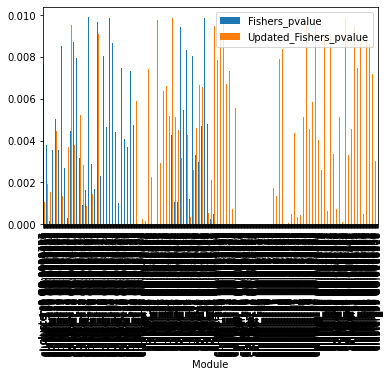

In [20]:
results_df_1.plot(x="Module", y=["Fishers_pvalue", "Updated_Fishers_pvalue"], kind="bar")

step 4b: do some analysis on the results
> count number of significant p-vals for both new and updated clusters

In [22]:
results_df_1['Fishers_pvalue'].count()

405

In [23]:
results_df_1['Updated_Fishers_pvalue'].count()

663